Imports:

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

Leer los datos del dataset

In [43]:
df = pd.read_csv('../data/raw/Airbnb_Data.csv')

In [44]:
print("\nResumen de valores nulos por columna:")
print(df.isnull().sum())


Resumen de valores nulos por columna:
id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64


Borrar columnas irrelevantes:

In [45]:
cols_to_drop = ['id', 'city', 'description', 'name', 'neighbourhood', 'thumbnail_url', 'host_response_rate', 'longitude', 'latitude', 'last_review', 'first_review', 'host_since']
df.drop(columns=cols_to_drop, inplace=True)

## Manejo de valores faltantes:

In [47]:
# Imputar valores faltantes:
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())

df['beds'] = df['beds'].fillna(df['beds'].median())

df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())

df['review_scores_rating'] = df['review_scores_rating'].fillna(df['review_scores_rating'].median())

# Para columnas booleanas o de dos opciones, imputar con -1
df['host_has_profile_pic'] = df['host_has_profile_pic'].fillna(-1)

df['host_identity_verified'] = df['host_identity_verified'].fillna(-1)

# Imputar con 'Unknown'
df['zipcode'] = df['zipcode'].fillna("Unknown")

#df['host_since'] = df['host_since'].fillna("Unknown")

Demostracion de manejo de nulos:

In [48]:
print(f'\nNulos:\n{df.isnull().sum()}')


Nulos:
log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
host_has_profile_pic      0
host_identity_verified    0
instant_bookable          0
number_of_reviews         0
review_scores_rating      0
zipcode                   0
bedrooms                  0
beds                      0
dtype: int64


Manejo de outliers:

In [49]:
# Calculamos los percentiles 1 y 99
lower_bound = df['log_price'].quantile(0.05)
upper_bound = df['log_price'].quantile(0.95)

print("Lower bound log_price:", lower_bound)
print("Upper bound log_price:", upper_bound)

# Recortar los valores que estén fuera de este rango
df['log_price'] = df['log_price'].clip(lower=lower_bound, upper=upper_bound)

Lower bound log_price: 3.688879454113936
Upper bound log_price: 6.052089168924417


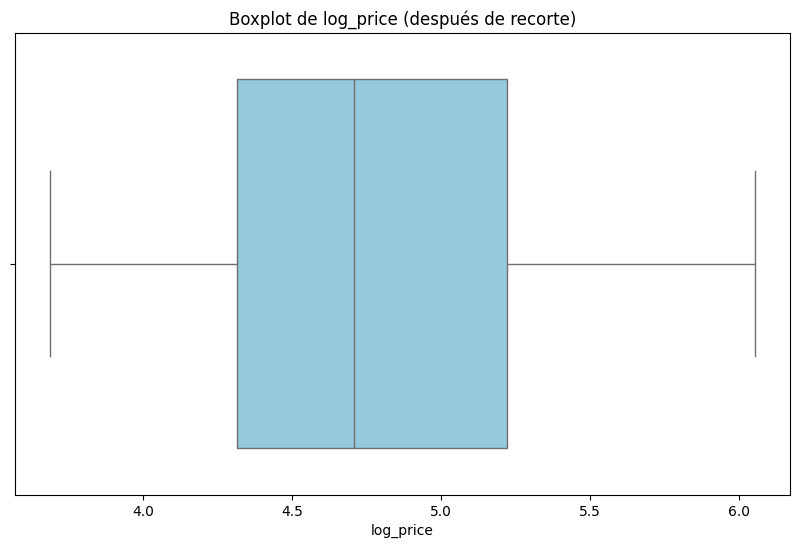

In [50]:
# Visualizar el efecto en 'log_price'
plt.figure(figsize=(10,6))
sns.boxplot(x=df['log_price'], color='skyblue')
plt.title("Boxplot de log_price (después de recorte)")
plt.xlabel("log_price")
plt.show()

In [51]:
print(f'\nForma:\n{df.shape}')
print(f'\nColumnas:\n{df.columns}')


Forma:
(74111, 17)

Columnas:
Index(['log_price', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee',
       'host_has_profile_pic', 'host_identity_verified', 'instant_bookable',
       'number_of_reviews', 'review_scores_rating', 'zipcode', 'bedrooms',
       'beds'],
      dtype='object')


Guardar el nuevo dataset limpio en processed data:

In [52]:
if os.path.exists("../data/processed/Airbnb_Data_processed.csv"):
  print("Eliminando archivo anterior...")
  os.remove("../data/processed/Airbnb_Data_processed.csv")
  
df.to_csv('../data/processed/Airbnb_Data_processed.csv', index=False)
print("Datos procesados guardados en Airbnb_Data_processed.csv")

Datos procesados guardados en Airbnb_Data_processed.csv
